# SALES DATA - Validation / Exploratory Analysis

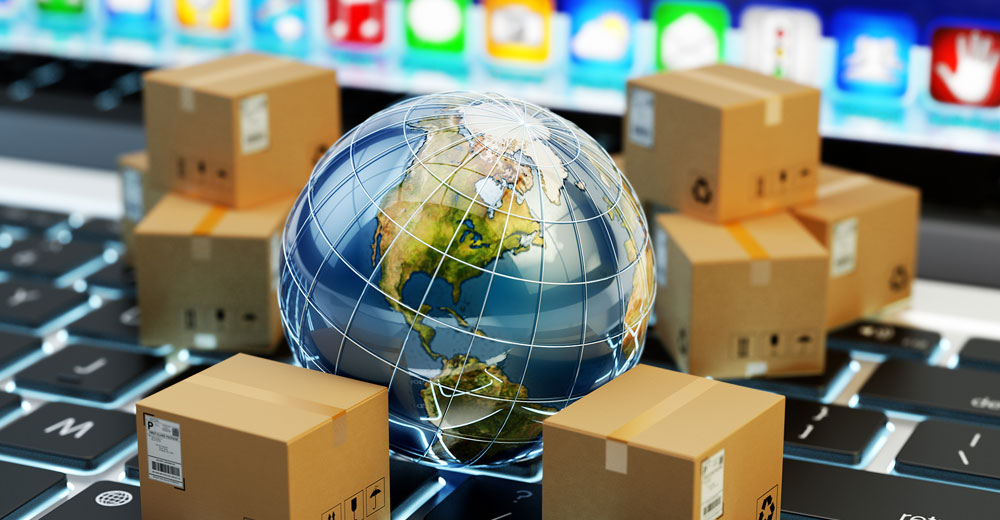

## Course of Action

1. Data Validation - We ensure the dataset is of high quality, ready for analysis.

2. Exploratory Analysis - We want to address key questions about business performance with aid of visualizations.


# Global Superstore (GS)

**Exploratory Analysis - Here are some key questions we seek to answer:**

- What is the total $ amount of goods shipped by Global Superstore (GS) within the timeframe of this dataset?
- Which product category generated the most sales for GS?
- Which 5 states in the US purchased the most from GS?
- Which are the top 10 selling products by quantity?
- Which customers from the top selling state, bought the top selling product (by quantity)?

Dataset: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting

#### Composed by: ilin3ccc.GITHUB
***

## 1. Data Validation

In [1]:
# We import csv file into pandas dataframe and find out it's dimensions
# Then, we preview the first row of data

import pandas as pd

df = pd.read_csv('train.csv')

print (df.shape)
print (" "*50)
print (df.iloc[0])

(9800, 18)
                                                  
Row ID                                           1
Order ID                            CA-2017-152156
Order Date                              08/11/2017
Ship Date                               11/11/2017
Ship Mode                             Second Class
Customer ID                               CG-12520
Customer Name                          Claire Gute
Segment                                   Consumer
Country                              United States
City                                     Henderson
State                                     Kentucky
Postal Code                                42420.0
Region                                       South
Product ID                         FUR-BO-10001798
Category                                 Furniture
Sub-Category                             Bookcases
Product Name     Bush Somerset Collection Bookcase
Sales                                       261.96
Name: 0, dtype: obje

In [2]:
# We isolate the relevant columns for analysis (all transactions are within the US)

df_sales = df[['Customer Name','State','Ship Date','Product Name','Category','Sales']] 
print (df_sales.head())

     Customer Name       State   Ship Date  \
0      Claire Gute    Kentucky  11/11/2017   
1      Claire Gute    Kentucky  11/11/2017   
2  Darrin Van Huff  California  16/06/2017   
3   Sean O'Donnell     Florida  18/10/2016   
4   Sean O'Donnell     Florida  18/10/2016   

                                        Product Name         Category  \
0                  Bush Somerset Collection Bookcase        Furniture   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...        Furniture   
2  Self-Adhesive Address Labels for Typewriters b...  Office Supplies   
3      Bretford CR4500 Series Slim Rectangular Table        Furniture   
4                     Eldon Fold 'N Roll Cart System  Office Supplies   

      Sales  
0  261.9600  
1  731.9400  
2   14.6200  
3  957.5775  
4   22.3680  


In [3]:
# We turn all non-missing values into 'False' boolean - isnull() [Opposite: notnull()]

missing_data = df_sales.isnull()
missing_data.head(5)

,Customer Name,City,State,Order Date,Ship Date,Product Name,Category,Sales
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [4]:
# We check / tabulate False booleans in the dataset

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Customer Name
False    9800
Name: Customer Name, dtype: int64

City
False    9800
Name: City, dtype: int64

State
False    9800
Name: State, dtype: int64

Order Date
False    9800
Name: Order Date, dtype: int64

Ship Date
False    9800
Name: Ship Date, dtype: int64

Product Name
False    9800
Name: Product Name, dtype: int64

Category
False    9800
Name: Category, dtype: int64

Sales
False    9800
Name: Sales, dtype: int64



All columns are showing 9800 in False boolean: We do not have any missing values within the dataset. **Data validated.** Ready for analysis!

## 2. Exploratory Analysis

In [4]:
# We import visualization package "Matplotlib" 

import matplotlib.pyplot as plt

# We look at basis statistics of the sales column

df_sales.describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [5]:
# We do this for other non-float variable columns as well

df_sales.describe(include=['object'])

,Customer Name,State,Ship Date,Product Name,Category
count,9800,9800,9800,9800,9800
unique,793,49,1326,1849,3
top,William Brown,California,26/09/2018,Staple envelope,Office Supplies
freq,35,1946,34,47,5909


In [6]:
# Total sales ($)

df_sales_sum = df_sales['Sales'].sum()
df_sales_sum

2261536.7827000003

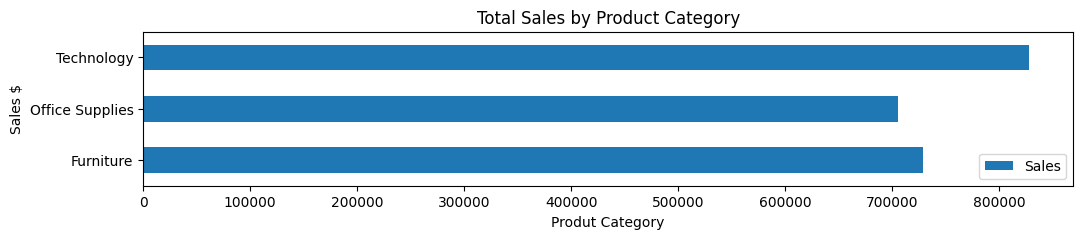

In [7]:
# Total sales broken down by product category

df_category = df[['Category','Sales']]
df_category_group = df_category.groupby(['Category'],as_index=True).sum()

# We visualize the results with a horizontal bar graph

df_category_group.plot(kind='barh', figsize=(12, 2))

plt.xlabel('Produt Category') 
plt.ylabel('Sales $') 
plt.title('Total Sales by Product Category')

plt.show()

In [8]:
# Top 5 sales generating states

df_sales_states = df_sales[['State','Sales']]
df_sales_states = df_sales_states.groupby(['State'],as_index=True).sum()
df_sales_states_top = df_sales_states.sort_values(by=['Sales'], ascending=False)

print (""*50)
print ("Here are the top 5 states which generated most sales for Global Store.")

df_sales_states_top.head(5)


Here are the top 5 states which generated most sales for Global Store.


,Sales
State,
California,446306.4635
New York,306361.1470
Texas,168572.5322
Washington,135206.8500
Pennsylvania,116276.6500


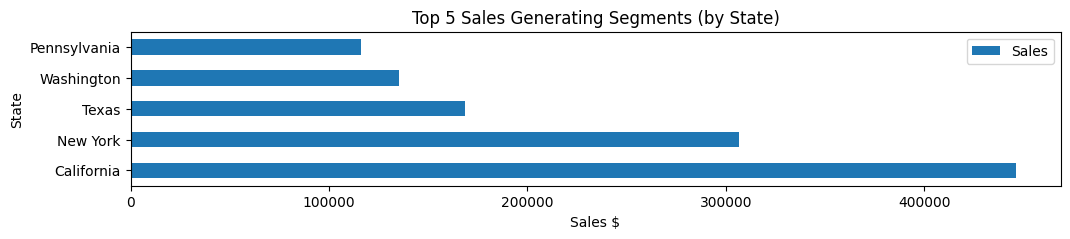

In [9]:
# We visualize the above findings

df_sales_states_top5 = df_sales_states_top.head(5)

df_sales_states_top5.plot(kind='barh', figsize=(12, 2))

plt.xlabel('Sales $') 
plt.ylabel('State') 
plt.title('Top 5 Sales Generating Segments (by State)')

plt.show()

In [10]:
print ('These are the top 10 selling products by quantity.')

df_sales['Product Name'].value_counts().head(10)

These are the top 10 selling products by quantity.


Staple envelope                                              47
Staples                                                      46
Easy-staple paper                                            44
Avery Non-Stick Binders                                      20
Staples in misc. colors                                      18
Staple remover                                               18
Storex Dura Pro Binders                                      17
KI Adjustable-Height Table                                   17
Staple-based wall hangings                                   16
Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
Name: Product Name, dtype: int64

In [11]:
# Here is a list of Californian customers who purchased 'Staple envelope '

df_cali = df_sales[df_sales['State'] == 'California'] 
df_cali = df_cali[df_cali['Product Name'] == 'Staple envelope']
df_cali['Customer Name']


3161     Herbert Flentye
5899    Linda Southworth
7239    Sean Christensen
7526        Ruben Ausman
7933         Rick Wilson
Name: Customer Name, dtype: object